In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import std
from sklearn import preprocessing

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

import xgboost as xg

### Data Processing

In [2]:
df = pd.read_csv("preprocessed.csv")
df.head(2)

,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date,DOW
0,206668,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,2022-02-11,4
1,206669,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,2022-02-11,4


In [3]:
df = df.drop(columns=['Unnamed: 0','date'],axis=1)

In [4]:
# one hot encoding
df_boosting = pd.get_dummies(data=df, columns=['airline','source_city',
                                              'departure_time','stops','arrival_time',
                                              'destination_city','class','DOW'])

In [5]:
df_boosting.head(2)

,duration,days_left,price,airline_Air_India,airline_Other,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,destination_city_Mumbai,class_Business,class_Economy,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
0,24.75,1,42220,1,0,0,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0
1,26.50,1,44450,1,0,0,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0


In [6]:
X = df_boosting.drop(['price'], axis=1)
y = df_boosting.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
X_train.shape

(216507, 41)

In [8]:
X_test.shape

(54127, 41)

In [12]:
X_train.head(2)

,duration,days_left,airline_Air_India,airline_Other,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,...,destination_city_Mumbai,class_Business,class_Economy,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
215043,25.83,22,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
131333,2.17,43,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


### Gradient Boosting

In [45]:
# grid search hyperparameter
GBR = GradientBoostingRegressor()
search_grid = {"max_leaf_nodes": [10, 20, 50],
               'max_depth':[4,10],
               'n_estimators':[20,40,60],
               'learning_rate':[0.01,.1],
               'random_state':[1]}
search = GridSearchCV(estimator=GBR,
                      param_grid=search_grid,
                      scoring='neg_mean_squared_error',
                      n_jobs=16,
                      cv=2,
                      verbose=True)

search.fit(X_train,y_train)
print('best parameters',search.best_params_)
print('best score', search.best_score_)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
best parameters {'learning_rate': 0.1, 'max_depth': 10, 'max_leaf_nodes': 50, 'n_estimators': 60, 'random_state': 1}
best score -9501456.143831722


In [64]:
# grid search hyperparameter
GBR = GradientBoostingRegressor()
search_grid = {"max_leaf_nodes": [50],
               'max_depth':[10],
               'n_estimators':[500,1000],
               'learning_rate':[.1],
               'random_state':[1]}
search = GridSearchCV(estimator=GBR,
                      param_grid=search_grid,
                      scoring='neg_mean_squared_error',
                      n_jobs=16,
                      cv=2,
                      verbose=True)

search.fit(X_train,y_train)
print('best parameters',search.best_params_)
print('best score', search.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
best parameters {'learning_rate': 0.1, 'max_depth': 10, 'max_leaf_nodes': 50, 'n_estimators': 1000, 'random_state': 1}
best score -4379764.404861472


In [46]:
# fit the final model
model_gb = GradientBoostingRegressor(n_estimators=60, learning_rate=0.1, max_depth=10, max_leaf_nodes=50, random_state=1)
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, max_leaf_nodes=50, n_estimators=60,
                          random_state=1)

In [58]:
# fit the final model
model_gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=10, max_leaf_nodes=50, random_state=1)
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, max_leaf_nodes=50, n_estimators=300,
                          random_state=1)

In [65]:
# fit the final model
model_gb = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=10, max_leaf_nodes=50, random_state=1)
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, max_leaf_nodes=50, n_estimators=1000,
                          random_state=1)

In [47]:
# predict the test result for 60 estimators
y_pred = model_gb.predict(X_test)

rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

r2 = r2_score(y_test, y_pred)
print("R^2 : % f" %(r2))

RMSE :  3099.311232
R^2 :  0.981054


In [59]:
# predict the test result for 300 estimators
y_pred = model_gb.predict(X_test)

rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

r2 = r2_score(y_test, y_pred)
print("R^2 : % f" %(r2))

RMSE :  2460.941477
R^2 :  0.988055


In [66]:
# predict the test result for 1000 estimators
y_pred = model_gb.predict(X_test)

rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

r2 = r2_score(y_test, y_pred)
print("R^2 : % f" %(r2))

RMSE :  1958.542800
R^2 :  0.992434


In [48]:
# check cv test -MSE
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_gb, X_test, y_test, scoring='neg_mean_squared_error', cv=cv, n_jobs=5, error_score='raise')
print('negative MSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

negative MSE: -9965764.265 (268769.264)


Text(0.5, 0, 'Gradient Boosting Regressor Feature Importance')

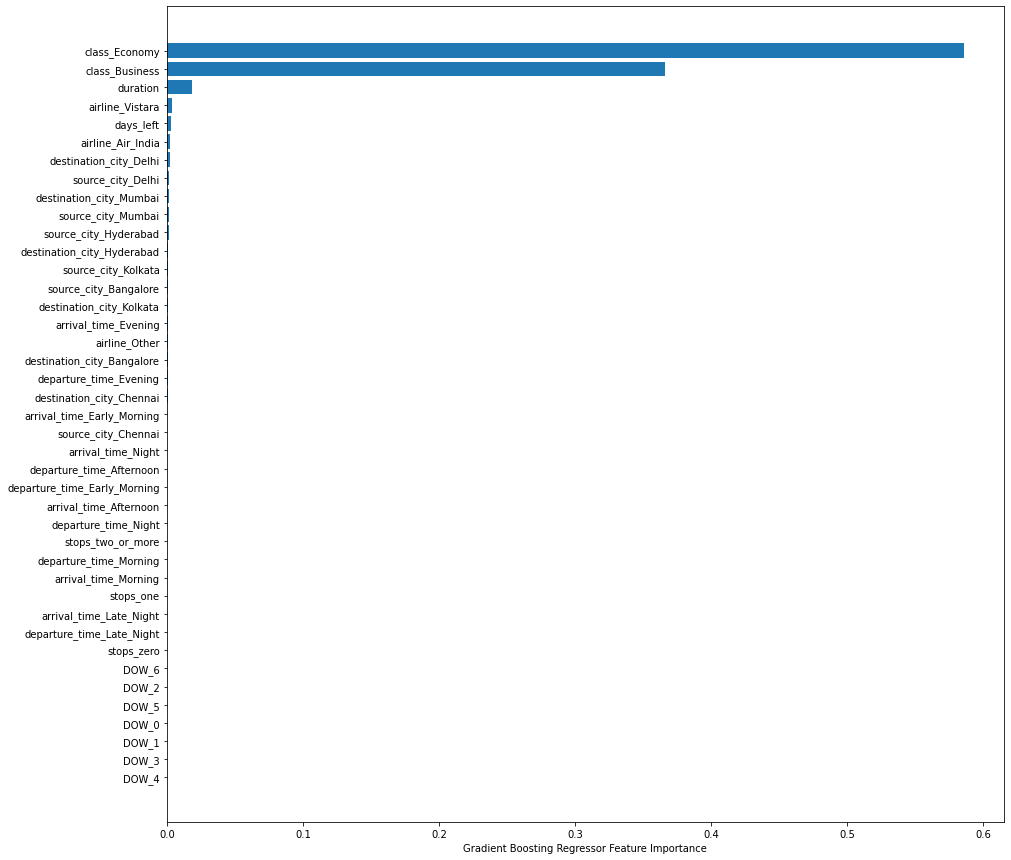

In [49]:
sorted_gbidx = model_gb.feature_importances_.argsort()
plt.figure(figsize=(15, 15))
plt.barh(X.columns[sorted_gbidx], model_gb.feature_importances_[sorted_gbidx])
plt.xlabel("Gradient Boosting Regressor Feature Importance")

### XGBoost

In [27]:
# grid search hyperparameter
XGB = xg.XGBRegressor()
search_grid = {'n_estimators':[200,500,1000],
               'learning_rate':[.001,0.01,.1],
               'max_depth':[1,2,4],
               'subsample':[.5,.75,1],
               'random_state':[1]}
search = GridSearchCV(estimator=XGB,
                      param_grid=search_grid,
                      scoring='neg_mean_squared_error',
                      n_jobs=16,
                      cv=2,
                      verbose=True)

search.fit(X_train,y_train)
print('best parameters',search.best_params_)
print('best score', search.best_score_)

Fitting 2 folds for each of 81 candidates, totalling 162 fits
best parameters {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000, 'random_state': 1, 'subsample': 0.75}
best score -9080076.737407925


In [52]:
# tune for gamma
XGB = xg.XGBRegressor()
search_grid = {'n_estimators': range(50, 500, 100),
               'learning_rate':[.1],
               'max_depth':[4],
               'gamma': [0, 0.5, 1.0],
               'subsample':[.75],
               'random_state':[1]}
search = GridSearchCV(estimator=XGB,
                      param_grid=search_grid,
                      scoring='neg_mean_squared_error',
                      n_jobs=16,
                      cv=2,
                      verbose=True)

search.fit(X_train,y_train)
print('best parameters',search.best_params_)
print('best score', search.best_score_)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
best parameters {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 450, 'random_state': 1, 'subsample': 0.75}
best score -10801561.2426495


In [53]:
# grid search hyperparameter
XGB = xg.XGBRegressor()
search_grid = {'n_estimators':[450],
               'learning_rate':[.1],
               'max_depth':[4,6,10],
               'subsample':[.75],
               'random_state':[1]}
search = GridSearchCV(estimator=XGB,
                      param_grid=search_grid,
                      scoring='neg_mean_squared_error',
                      n_jobs=16,
                      cv=2,
                      verbose=True)

search.fit(X_train,y_train)
print('best parameters',search.best_params_)
print('best score', search.best_score_)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
best parameters {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 450, 'random_state': 1, 'subsample': 0.75}
best score -3716757.5996464575


In [54]:
# fit the final model
model_xgb = xg.XGBRegressor(learning_rate=0.1, max_depth=10, n_estimators=1000, random_state=1,subsample=0.75)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=1, ...)

In [60]:
# predict the test result
y_pred = model_xgb.predict(X_test)

rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

r2 = r2_score(y_test, y_pred)
print("R^2 : % f" %(r2))

RMSE :  1792.751961
R^2 :  0.993661


In [56]:
# cv negative MSE for test set
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_xgb, X_test, y_test, scoring='neg_mean_squared_error', cv=cv, n_jobs=16, error_score='raise')
print('negative MSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

negative MSE: -5319640.782 (229267.998)


In [63]:
# MAE
np.mean(abs(y_pred-y_test)) 

827.7173480875139

Text(0.5, 0, 'XGBoost Feature Importance')

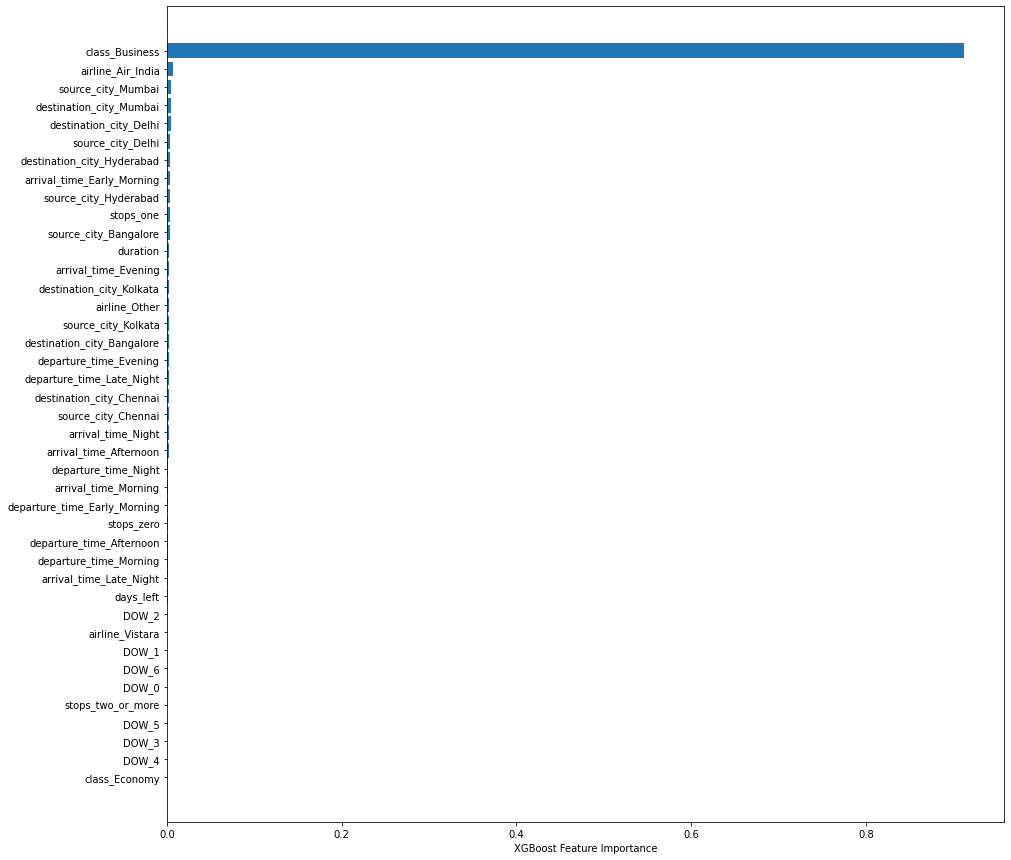

In [57]:
sorted_xgbidx = model_xgb.feature_importances_.argsort()
plt.figure(figsize=(15, 15))
plt.barh(X.columns[sorted_xgbidx], model_xgb.feature_importances_[sorted_xgbidx])
plt.xlabel("XGBoost Feature Importance")

In [61]:
y_pred

array([63247.965 ,  2265.0588,  7840.4507, ...,  3301.3584, 52161.918 ,
        3931.4717], dtype=float32)

In [62]:
y_test

42117     70588
178731     2202
243678     7767
184974     7813
222136    10017
          ...  
189561     5322
192023     3720
153250     3334
18963     50957
199765     3999
Name: price, Length: 54127, dtype: int64